In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
from sklearn.datasets import make_regression

from sklearn import metrics
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [108]:
df = pd.read_json(r"data_harvest_clean.json", dtype={'code_postal': 'str'})
df.head()

,version,marque,modele,date_fabrication,kilometrage,couleur,carrosserie,code_postal,energie,emission,consommation,transmission,portes,sieges,cv_fiscaux,cv_reels,prix_vente
0,duster tce 130 fap 4x2 prestige,dacia,duster,2019,18300,blanc,4x4,86130,essence,0,0.0,manuelle,4,5,7,130,17600
1,cooper s red hot chili 192 cv bva,mini,cooper,2018,47500,rouge foncé,berline,59240,essence,119,0.0,automatique,2,4,10,192,24990
2,1.5 dci 110ch fap ultimate edition,nissan,qashqai,2013,166400,gris,break,53000,diesel,129,0.0,manuelle,4,5,6,110,8490
3,qashqai 1.6 dci 130 xtronic tekna,nissan,qashqai,2016,61500,gris foncé,4x4,01300,diesel,128,4.9,automatique,4,5,7,130,16900
4,one d 95 ch edition blackfriars,mini,cooper,2018,58529,gris,berline,30200,diesel,99,0.0,manuelle,4,5,5,95,17900


In [109]:
df.dtypes

version              object
marque               object
modele               object
date_fabrication      int64
kilometrage           int64
couleur              object
carrosserie          object
code_postal          object
energie              object
emission              int64
consommation        float64
transmission         object
portes                int64
sieges                int64
cv_fiscaux            int64
cv_reels              int64
prix_vente            int64
dtype: object

<AxesSubplot:>

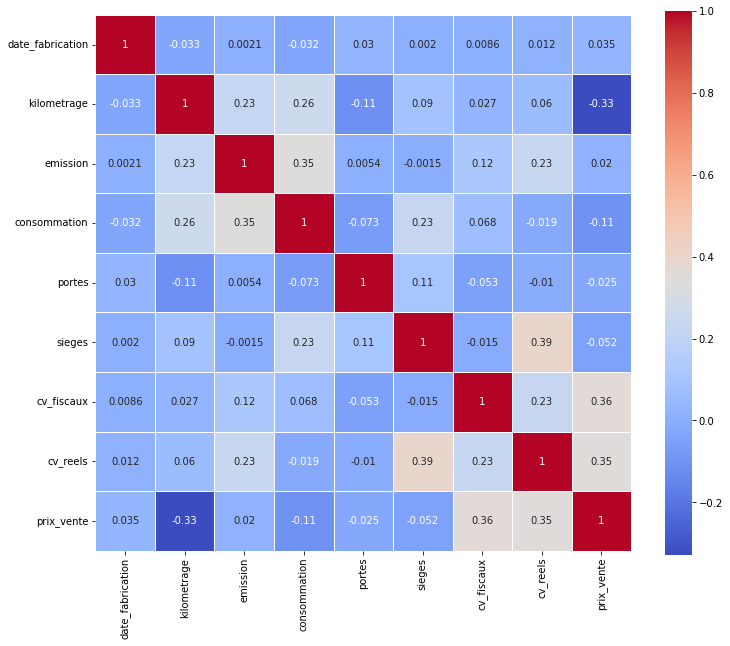

In [110]:
cor = df.corr() 

plt.subplots(figsize=(12,10))
sns.heatmap(cor, 
            square = True, 
            cmap="coolwarm",
            linewidths=0.5,
            annot=True )

In [115]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorielle = ["marque", "modele", "couleur", "carrosserie", "energie", "transmission"]

categorielle_encoder = OneHotEncoder()

categorielle_encoder.fit("marque", "modele", "couleur", "carrosserie", "energie", "transmission")

preprocessing = ColumnTransformer(
[
        ("cat", categorielle_encoder, categorielle)
    ]
)


TypeError: OneHotEncoder.fit() takes from 2 to 3 positional arguments but 7 were given

In [112]:
#X, y = df(n_samples=3000, n_features=9)
# print(X[0:2])
# print(y[0:2])

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X.head()



(17231, 15) (17231,)


,marque,modele,date_fabrication,kilometrage,couleur,carrosserie,code_postal,energie,emission,consommation,transmission,portes,sieges,cv_fiscaux,cv_reels
0,dacia,duster,2019,18300,blanc,4x4,86130,essence,0,0.0,manuelle,4,5,7,130
1,mini,cooper,2018,47500,rouge foncé,berline,59240,essence,119,0.0,automatique,2,4,10,192
2,nissan,qashqai,2013,166400,gris,break,53000,diesel,129,0.0,manuelle,4,5,6,110
3,nissan,qashqai,2016,61500,gris foncé,4x4,01300,diesel,128,4.9,automatique,4,5,7,130
4,mini,cooper,2018,58529,gris,berline,30200,diesel,99,0.0,manuelle,4,5,5,95


In [113]:
set_config(print_changed_only=False) 

# dtr = DecisionTreeRegressor()
# print(dtr)

dtr = DecisionTreeRegressor(criterion='squared_error', min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best') 

In [114]:
dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print("R-squared:", score) 

ValueError: could not convert string to float: 'audi'

In [ ]:
y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  0.4622512062215827
RMSE:  0.23112560311079136


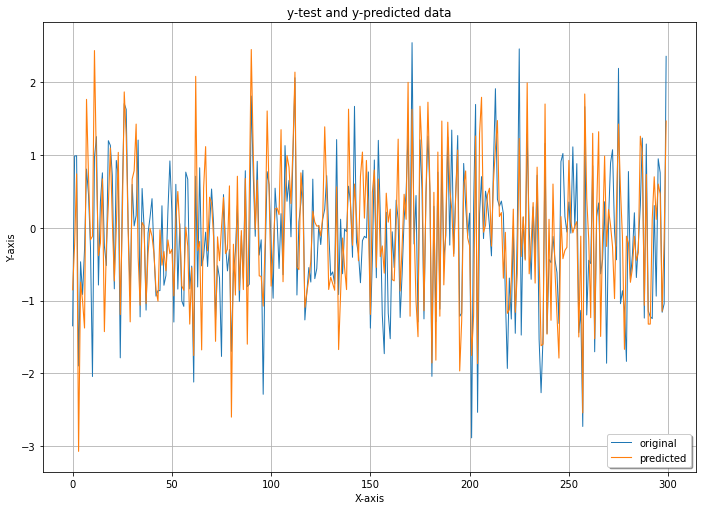

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 